## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  21.154690   907.029400  0.690720  8.530045  626.798546
1  23.916132  1439.735433  0.268703  2.327149  387.354230
2  93.126210   718.231329  0.889370  7.145528  645.501984
3  96.689016  1604.286302  0.038793  2.666917  114.933303
4  54.631515   949.365199  0.334986  1.697617  322.635438


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0432198	total: 57.5ms	remaining: 57.4s
1:	learn: 1.0324326	total: 58ms	remaining: 28.9s
2:	learn: 1.0195886	total: 58.6ms	remaining: 19.5s
3:	learn: 1.0074192	total: 59ms	remaining: 14.7s
4:	learn: 0.9940821	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9831298	total: 60.1ms	remaining: 9.95s
6:	learn: 0.9689380	total: 61.2ms	remaining: 8.69s
7:	learn: 0.9543183	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9404471	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9273904	total: 62.6ms	remaining: 6.19s
10:	learn: 0.9157608	total: 62.9ms	remaining: 5.66s
11:	learn: 0.9026136	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8897044	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8778267	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8649850	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8559119	total: 65.3ms	remaining: 4.02s
16:	learn: 0.8447728	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8330786	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8245148	total: 66.8ms	remaining: 3.4

107:	learn: 0.2921168	total: 106ms	remaining: 875ms
108:	learn: 0.2886338	total: 107ms	remaining: 871ms
109:	learn: 0.2860162	total: 107ms	remaining: 865ms
110:	learn: 0.2829300	total: 107ms	remaining: 859ms
111:	learn: 0.2803081	total: 108ms	remaining: 854ms
112:	learn: 0.2774625	total: 108ms	remaining: 849ms
113:	learn: 0.2749015	total: 109ms	remaining: 844ms
114:	learn: 0.2727104	total: 109ms	remaining: 838ms
115:	learn: 0.2695203	total: 109ms	remaining: 833ms
116:	learn: 0.2668836	total: 110ms	remaining: 829ms
117:	learn: 0.2645947	total: 110ms	remaining: 824ms
118:	learn: 0.2619799	total: 111ms	remaining: 821ms
119:	learn: 0.2592361	total: 111ms	remaining: 816ms
120:	learn: 0.2568013	total: 112ms	remaining: 812ms
121:	learn: 0.2536803	total: 112ms	remaining: 808ms
122:	learn: 0.2520971	total: 113ms	remaining: 803ms
123:	learn: 0.2495951	total: 113ms	remaining: 799ms
124:	learn: 0.2476416	total: 113ms	remaining: 794ms
125:	learn: 0.2449059	total: 114ms	remaining: 789ms
126:	learn: 

297:	learn: 0.0909140	total: 186ms	remaining: 438ms
298:	learn: 0.0906811	total: 186ms	remaining: 437ms
299:	learn: 0.0901609	total: 187ms	remaining: 436ms
300:	learn: 0.0899169	total: 187ms	remaining: 435ms
301:	learn: 0.0896759	total: 188ms	remaining: 434ms
302:	learn: 0.0889163	total: 188ms	remaining: 433ms
303:	learn: 0.0887027	total: 189ms	remaining: 432ms
304:	learn: 0.0884972	total: 189ms	remaining: 430ms
305:	learn: 0.0878829	total: 189ms	remaining: 429ms
306:	learn: 0.0872081	total: 190ms	remaining: 428ms
307:	learn: 0.0869723	total: 190ms	remaining: 427ms
308:	learn: 0.0864256	total: 190ms	remaining: 426ms
309:	learn: 0.0861863	total: 191ms	remaining: 424ms
310:	learn: 0.0859811	total: 191ms	remaining: 423ms
311:	learn: 0.0857162	total: 192ms	remaining: 422ms
312:	learn: 0.0852266	total: 192ms	remaining: 422ms
313:	learn: 0.0849773	total: 192ms	remaining: 420ms
314:	learn: 0.0847875	total: 193ms	remaining: 419ms
315:	learn: 0.0843109	total: 193ms	remaining: 418ms
316:	learn: 

545:	learn: 0.0414871	total: 288ms	remaining: 239ms
546:	learn: 0.0413622	total: 288ms	remaining: 239ms
547:	learn: 0.0413330	total: 289ms	remaining: 238ms
548:	learn: 0.0410471	total: 289ms	remaining: 238ms
549:	learn: 0.0410206	total: 290ms	remaining: 237ms
550:	learn: 0.0409944	total: 290ms	remaining: 236ms
551:	learn: 0.0407866	total: 290ms	remaining: 236ms
552:	learn: 0.0406109	total: 291ms	remaining: 235ms
553:	learn: 0.0404598	total: 291ms	remaining: 234ms
554:	learn: 0.0403441	total: 292ms	remaining: 234ms
555:	learn: 0.0400707	total: 292ms	remaining: 233ms
556:	learn: 0.0400456	total: 293ms	remaining: 233ms
557:	learn: 0.0399321	total: 293ms	remaining: 232ms
558:	learn: 0.0399074	total: 294ms	remaining: 232ms
559:	learn: 0.0396421	total: 294ms	remaining: 231ms
560:	learn: 0.0394755	total: 294ms	remaining: 230ms
561:	learn: 0.0394496	total: 295ms	remaining: 230ms
562:	learn: 0.0391871	total: 295ms	remaining: 229ms
563:	learn: 0.0390765	total: 296ms	remaining: 229ms
564:	learn: 

730:	learn: 0.0202725	total: 367ms	remaining: 135ms
731:	learn: 0.0201349	total: 367ms	remaining: 135ms
732:	learn: 0.0200337	total: 368ms	remaining: 134ms
733:	learn: 0.0199003	total: 368ms	remaining: 133ms
734:	learn: 0.0197813	total: 369ms	remaining: 133ms
735:	learn: 0.0196853	total: 369ms	remaining: 132ms
736:	learn: 0.0195578	total: 369ms	remaining: 132ms
737:	learn: 0.0194679	total: 370ms	remaining: 131ms
738:	learn: 0.0193806	total: 370ms	remaining: 131ms
739:	learn: 0.0192571	total: 371ms	remaining: 130ms
740:	learn: 0.0191454	total: 371ms	remaining: 130ms
741:	learn: 0.0190358	total: 372ms	remaining: 129ms
742:	learn: 0.0189175	total: 372ms	remaining: 129ms
743:	learn: 0.0188095	total: 372ms	remaining: 128ms
744:	learn: 0.0187042	total: 373ms	remaining: 128ms
745:	learn: 0.0186012	total: 373ms	remaining: 127ms
746:	learn: 0.0185410	total: 373ms	remaining: 126ms
747:	learn: 0.0184787	total: 374ms	remaining: 126ms
748:	learn: 0.0183991	total: 374ms	remaining: 125ms
749:	learn: 

953:	learn: 0.0104884	total: 462ms	remaining: 22.3ms
954:	learn: 0.0104510	total: 462ms	remaining: 21.8ms
955:	learn: 0.0104220	total: 463ms	remaining: 21.3ms
956:	learn: 0.0103731	total: 463ms	remaining: 20.8ms
957:	learn: 0.0103451	total: 464ms	remaining: 20.3ms
958:	learn: 0.0103086	total: 464ms	remaining: 19.8ms
959:	learn: 0.0102804	total: 464ms	remaining: 19.4ms
960:	learn: 0.0102706	total: 465ms	remaining: 18.9ms
961:	learn: 0.0102369	total: 465ms	remaining: 18.4ms
962:	learn: 0.0102012	total: 466ms	remaining: 17.9ms
963:	learn: 0.0101736	total: 466ms	remaining: 17.4ms
964:	learn: 0.0101640	total: 467ms	remaining: 16.9ms
965:	learn: 0.0101310	total: 467ms	remaining: 16.4ms
966:	learn: 0.0101217	total: 467ms	remaining: 16ms
967:	learn: 0.0100920	total: 468ms	remaining: 15.5ms
968:	learn: 0.0100572	total: 468ms	remaining: 15ms
969:	learn: 0.0100231	total: 469ms	remaining: 14.5ms
970:	learn: 0.0099992	total: 469ms	remaining: 14ms
971:	learn: 0.0099542	total: 470ms	remaining: 13.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

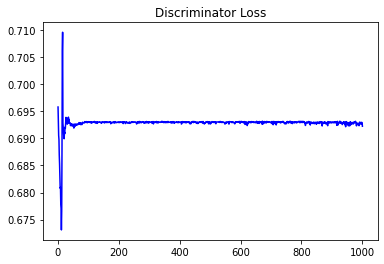

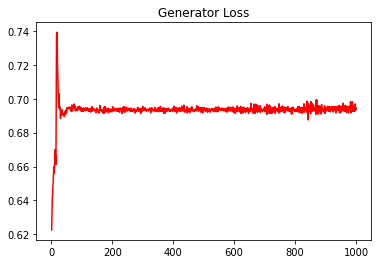

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.011228253917308618


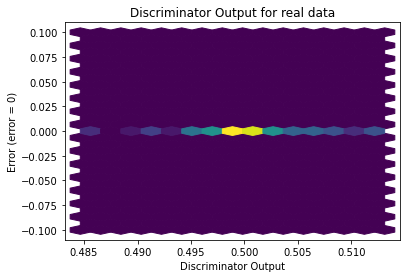

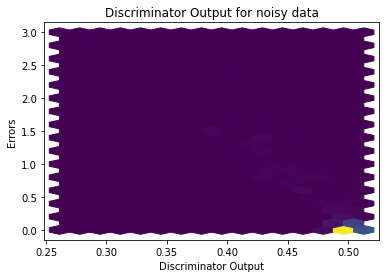

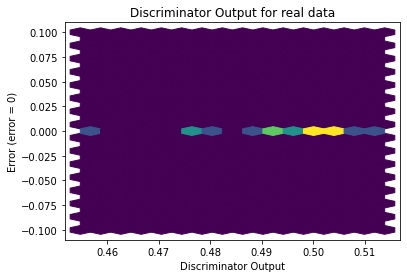

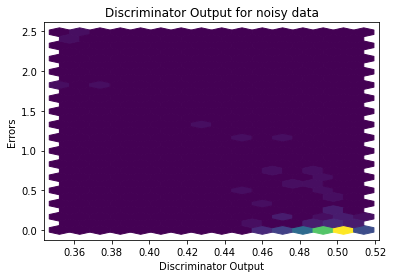

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


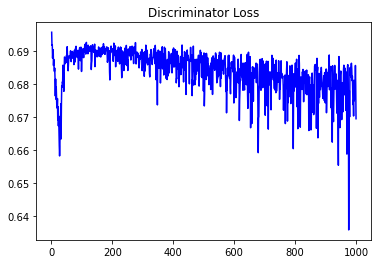

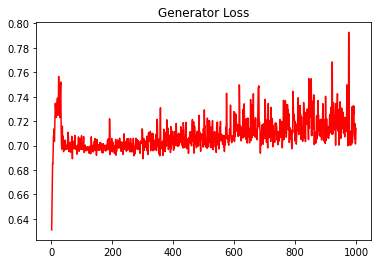

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0026176277982896544


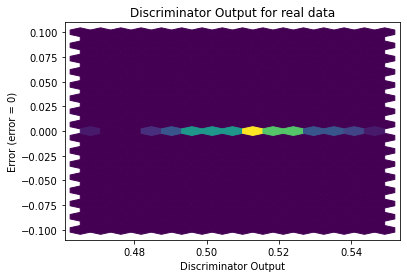

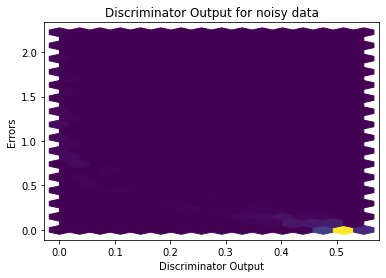

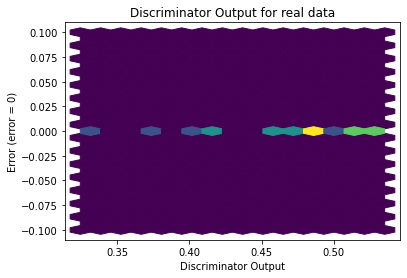

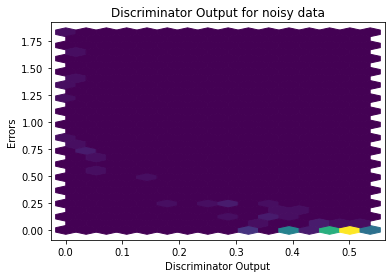

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1222]], requires_grad=True)
